## Train on MNIST

In [8]:
#import joblib

import numpy as np
from numpy import logical_and as land
from numpy import logical_not as lnot
from skimage.feature import canny
from skimage.transform import rescale, ProjectiveTransform, warp
from skimage.morphology import dilation, disk
import cv2 as cv
import tensorflow
import torch

import matplotlib.pyplot as plt
from skimage import io
from skimage.io import imread


SCALE = 0.33


def predict_image(image):
    img = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    edges = canny(img,sigma=0.3,low_threshold=0.3*np.mean(img), high_threshold=1*np.mean(img))
    sal = disk(1)
    edges = dilation(edges, sal)
    
    edges = (edges).astype(np.uint8)
    ext_contours = cv.findContours(edges.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)[0]

    for n, contour in enumerate(ext_contours):
        contour = np.array(contour).squeeze() # we need to remove one dim, se below
    #if contour.ndim > 1:
     #   ax.plot(contour[:, 0], contour[:, 1], linewidth=2)
        
    contour = max(ext_contours, key= lambda x : cv.contourArea(x))

    # we need to remove one unnecessary dimension
    contour = contour.squeeze()
    image = np.zeros(img.shape)
    fill = cv.fillPoly(image, [contour], (255, 255, 255))

    #plt.figure(dpi=150)
    #plt.subplot(1,2,1)   
    # plt.axis('off')
    #plt.imshow(img, cmap=plt.cm.gray)
    #plt.subplot(1,2,2)     
    # plt.axis('off')
    #plt.imshow(fill, cmap=plt.cm.gray)

    mask = np.bool_(np.ones_like(image))

    # loading train image:
    train_img_4 = cv.imread('/autograder/source/train/train_4.jpg', 0)

    # loading model:  (you can use any other pickle-like format)
    #model = joblib.load('/autograder/submission/model.joblib')
    #model = joblib.load('model.joblib')
    #model = torch.load('model.joblib')
    #model.eval()
    
    checkpoint = torch.load('filename.pth.tar')
    model.load_state_dict(checkpoint['state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer'])
    
    res = []

    for digit in cells:
        prediction = model.predict(digit.reshape(1, 28, 28, 1)) 
        if (max(sum(prediction)))<0.5:
            res.append(-1)
        else:
            res.append(np.argmax(prediction))
    
        
    l1=[]
    l2 = []
    l3 = []
    l4 =[]
    l5= []
    l6 =[]
    l7 =[]
    l8 = []
    l9 =[]
    for i in range(81):
        if i//9==0:
            l1.append(res[i])
        if i//9==1:
            l2.append(res[i])
        if i//9==2:
            l3.append(res[i])
        if i//9==3:
            l4.append(res[i])
        if i//9==4:
            l5.append(res[i])
        if i//9==5:
            l6.append(res[i])
        if i//9==6:
            l7.append(res[i])
        if i//9==7:
            l8.append(res[i])
        if i//9==8:
            l9.append(res[i])
    
    cell_res = [l1, l2, l3, l4, l5, l6, l7, l8, l9]
    
    #sudoku_digits = [
    #    np.int16([[-1, -1, -1, -1, -1, -1, -1, -1, -1],
    #              [-1, -1, -1,  8,  9,  4, -1, -1, -1],
    #              [-1, -1, -1,  6, -1,  1, -1, -1, -1],
    #              [-1,  6,  5,  1, -1,  9,  7,  8, -1],
    #              [-1,  1, -1, -1, -1, -1, -1,  3, -1],
    #              [-1,  3,  9,  4, -1,  5,  6,  1, -1],
    #              [-1, -1, -1,  8, -1,  2, -1, -1, -1],
    #              [-1, -1, -1,  9,  1,  3, -1, -1, -1],
    #              [-1, -1, -1, -1, -1, -1, -1, -1, -1]]),]        
    sudoku_digits = [np.int16(cell_res),]
    #cell_res
    
    return mask, sudoku_digits




ModuleNotFoundError: No module named 'torch'

In [6]:
img = cv.imread("train_0.jpg")
predict_image(img)

NameError: name 'torch' is not defined

In [10]:
!pip install torch

  Using cached torch-0.1.2.post2.tar.gz (128 kB)


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\admin\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\admin\\AppData\\Local\\Temp\\pip-install-bhhw7mur\\torch\\setup.py'"'"'; __file__='"'"'C:\\Users\\admin\\AppData\\Local\\Temp\\pip-install-bhhw7mur\\torch\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\admin\AppData\Local\Temp\pip-wheel-of7kdi8a'
       cwd: C:\Users\admin\AppData\Local\Temp\pip-install-bhhw7mur\torch\
  Complete output (30 lines):
  running bdist_wheel
  running build
  running build_deps
  Traceback (most recent call last):
    File "<string>", line 1, in <module>
    File "C:\Users\admin\AppData\Local\Temp\pip-install-bhhw7mur\torch\setup.py", line 225, in <module>
      setup(name="torch", version="0.1.2.post2",
    File "C:\Users\admin\anaconda3\

  Running setup.py clean for torch
Failed to build torch
    Running setup.py install for torch: started
    Running setup.py install for torch: finished with status 'error'


In [1]:
import joblib
import numpy as np
from mnist import MNIST
from sklearn.ensemble import RandomForestClassifier

save_model_path = "."
MNIST_CELL_SIZE = 28

mnist_data_path = '.'
mnist_data = MNIST(mnist_data_path)
mnist_data.gz = True

images_train, labels_train = mnist_data.load_training()
images_test, labels_test = mnist_data.load_testing()

In [2]:
images_train = np.uint8([np.reshape(im, (MNIST_CELL_SIZE,) * 2) for im in images_train])
images_test = np.uint8([np.reshape(im, (MNIST_CELL_SIZE,) * 2) for im in images_test])
labels_train, labels_test = np.int16(labels_train), np.int16(labels_test)

# EXAMPLE OF TRAINING RandomForest

In [3]:
features_train = np.array([im.ravel() for im in images_train])
features_test = np.array([im.ravel() for im in images_test])


In [4]:
rf = RandomForestClassifier(n_jobs=-1, random_state=666)
rf.fit(features_train, labels_train)

# SAVING MODEL !!!
# joblib.dump(rf, save_model_path)
# joblib.load()

print_accuracy = True

if print_accuracy:
    from sklearn.metrics import accuracy_score
    print(accuracy_score(labels_test, rf.predict(features_test)))

0.9695


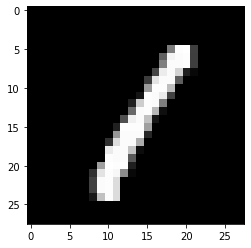

In [21]:
import matplotlib.pyplot as plt
plt.imshow(images_train[3], cmap=plt.cm.gray)

In [22]:
images_train[3]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 124, 253, 255,  63,   0,   0,   0,   0,
          0,   0],
       [  

In [2]:
!pip install keras

In [67]:
#import joblib

import numpy as np
from numpy import logical_and as land
from numpy import logical_not as lnot
from skimage.feature import canny
from skimage.transform import rescale, ProjectiveTransform, warp
from skimage.morphology import dilation, disk
import cv2 as cv
#import tensorflow
#import torch
from tensorflow import keras

import matplotlib.pyplot as plt
from skimage import io
from skimage.io import imread


SCALE = 0.33


def predict_image(image):
    img = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    plt.imshow(img, cmap=plt.cm.gray)
    blurred = cv.GaussianBlur(img, (7, 7), 3)

    thresh = cv.adaptiveThreshold(blurred, 255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 15, 1)
    thresh = cv.bitwise_not(thresh)
    ext_contours = cv.findContours(thresh.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)[0]

    for n, contour in enumerate(ext_contours):
        contour = np.array(contour).squeeze() # we need to remove one dim, se below
        
    contour = max(ext_contours, key= lambda x : cv.contourArea(x))
    contour = contour.squeeze()
    image = np.zeros(img.shape)
    fill = cv.fillPoly(image, [contour], (255, 255, 255))

    mask = np.bool_(fill)

    # loading train image:
    train_img_4 = cv.imread('/autograder/source/train/train_4.jpg', 0)
    
    epsilon = 0.05 * cv.arcLength(contour, True)
    corners = cv.approxPolyDP(contour, epsilon, True).squeeze()
    dis = []
    a = [0,0]
    for i in range(4):
        dist = np.linalg.norm(a-corners[i])
        dis.append(dist)

    ff = np.argmin(dis)
    tt = np.argmax(dis)
    
    for i in range(4):
        if i!=ff and i!=tt:
            if corners[i][1]<corners[tt][1] and corners[i][0]>corners[ff][0]:
                fr = i
            if corners[i][1]>corners[ff][1] and corners[i][0]<corners[tt][0]:
                tw = i
    cc =[]
    for i in range(4):
        if i==0:
            cc.append(list(corners[ff]))
        if i==1:
            cc.append(list(corners[tw]))
        if i==2:
            cc.append(list(corners[tt]))
        if i==3:
            cc.append(list(corners[fr]))
        
    corners = np.array(cc)

    points_current = corners
    size = 324
    if corners[3][1] < corners[2][1]:
        points_desired = np.array([[0, 0],[0, size], [size, size],[size, 0]])   
    else:
        points_desired = np.array([[size, 0],[0, 0],[0, size], [size, size]])
    tform = ProjectiveTransform()
    tform.estimate(points_desired, points_current)
    image_warped = warp(img, tform)[:size, :size]
    
    ret, bw_img = cv.threshold(image_warped*255,80,255,cv.THRESH_BINARY)
    bw_img = (255-bw_img)
    #image_warped = cv.bitwise_not(image_warped)
    plt.imshow(bw_img, cmap=plt.cm.gray)
    

    cell_size = int(image_warped.shape[0]/9)
    cells = []
    sums = []
    for i in range(9):
        for j in range(9):
            c = bw_img[cell_size*i+4:cell_size*(i+1)-4,cell_size*j+4:cell_size*(j+1)-4]
            #c_scaled = rescale(img, 0.3, multichannel=False)
            sums.append(np.sum(c))
            cells.append(c)
            
    cells = np.array(cells)
    sums = np.array(sums)
    #print(sums)
    #plt.imshow(cells[8], cmap=plt.cm.gray)
    #c = image_warped[cell*7:cell*8,0:cell]

    


    # loading model:  (you can use any other pickle-like format)
    #model = joblib.load('/autograder/submission/model.joblib')
    #model = joblib.load('model.joblib')
 
    #model = keras.models.load_model("/autograder/submission/mod.h5")
    model = keras.models.load_model('C:/Users/admin/Desktop/Skoltech/Intro to CV/HW2/mod.h5')
    
    res = []

    for digit in cells:
        prediction = model.predict(digit.reshape(1, 28, 28, 1)) 
        if (max(sum(prediction)))<0.4:
            res.append(-1)
        else:
            res.append(np.argmax(prediction))
       
    l1 = []
    l2 = []
    l3 = []
    l4 = []
    l5 = []
    l6 = []
    l7 = []
    l8 = []
    l9 = []
    for i in range(81):
        if i//9==0:
            l1.append(res[i])
        if i//9==1:
            l2.append(res[i])
        if i//9==2:
            l3.append(res[i])
        if i//9==3:
            l4.append(res[i])
        if i//9==4:
            l5.append(res[i])
        if i//9==5:
            l6.append(res[i])
        if i//9==6:
            l7.append(res[i])
        if i//9==7:
            l8.append(res[i])
        if i//9==8:
            l9.append(res[i])
    
    cell_res = [l1, l2, l3, l4, l5, l6, l7, l8, l9]
    k = 0
    for i in cell_res:
        #print(i)
        for j in range(9):
            if sums[k] < 5500:
                i[j] = -1
            k += 1
    
    #sudoku_digits = [
    #    np.int16([[-1, -1, -1, -1, -1, -1, -1, -1, -1],
    #              [-1, -1, -1,  8,  9,  4, -1, -1, -1],
    #              [-1, -1, -1,  6, -1,  1, -1, -1, -1],
    #              [-1,  6,  5,  1, -1,  9,  7,  8, -1],
    #              [-1,  1, -1, -1, -1, -1, -1,  3, -1],
    #              [-1,  3,  9,  4, -1,  5,  6,  1, -1],
    #              [-1, -1, -1,  8, -1,  2, -1, -1, -1],
    #              [-1, -1, -1,  9,  1,  3, -1, -1, -1],
    #              [-1, -1, -1, -1, -1, -1, -1, -1, -1]]),]        
    sudoku_digits = [np.int16(cell_res),]
    #cell_res
    
    return mask, sudoku_digits




In [98]:
#import joblib

import numpy as np
from numpy import logical_and as land
from numpy import logical_not as lnot
from skimage.feature import canny
from skimage.transform import rescale, ProjectiveTransform, warp
from skimage.morphology import dilation, disk
import cv2 as cv
#import tensorflow
#import torch
from tensorflow import keras

import matplotlib.pyplot as plt
from skimage import io
from skimage.io import imread


SCALE = 0.33


def predict_image(image):
    img = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    plt.imshow(img, cmap=plt.cm.gray)
    blurred = cv.GaussianBlur(img, (7, 7), 3)
    contrast_game_img = np.clip(2.5*contrast_game_img + 35, 0, 255).astype(np.uint8)

    thresh = cv.adaptiveThreshold(blurred, 255,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 15, 1)
    thresh = cv.bitwise_not(thresh)
    ext_contours = cv.findContours(thresh.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)[0]

    for n, contour in enumerate(ext_contours):
        contour = np.array(contour).squeeze() # we need to remove one dim, se below
        
    contour = max(ext_contours, key= lambda x : cv.contourArea(x))
    contour = contour.squeeze()
    image = np.zeros(img.shape)
    fill = cv.fillPoly(image, [contour], (255, 255, 255))

    mask = np.bool_(fill)

    # loading train image:
    train_img_4 = cv.imread('/autograder/source/train/train_4.jpg', 0)
    
    epsilon = 0.05 * cv.arcLength(contour, True)
    corners = cv.approxPolyDP(contour, epsilon, True).squeeze()
    dis = []
    a = [0,0]
    for i in range(4):
        dist = np.linalg.norm(a-corners[i])
        dis.append(dist)

    ff = np.argmin(dis)
    tt = np.argmax(dis)
    
    for i in range(4):
        if i!=ff and i!=tt:
            if corners[i][1]<corners[tt][1] and corners[i][0]>corners[ff][0]:
                fr = i
            if corners[i][1]>corners[ff][1] and corners[i][0]<corners[tt][0]:
                tw = i
    cc =[]
    for i in range(4):
        if i==0:
            cc.append(list(corners[ff]))
        if i==1:
            cc.append(list(corners[tw]))
        if i==2:
            cc.append(list(corners[tt]))
        if i==3:
            cc.append(list(corners[fr]))
        
    corners = np.array(cc)

    points_current = corners
    size = 324
    if corners[3][1] < corners[2][1]:
        points_desired = np.array([[0, 0],[0, size], [size, size],[size, 0]])   
    else:
        points_desired = np.array([[size, 0],[0, 0],[0, size], [size, size]])
    tform = ProjectiveTransform()
    tform.estimate(points_desired, points_current)
    image_warped = warp(img, tform)[:size, :size]
    
    ret, bw_img = cv.threshold(image_warped*255,80,255,cv.THRESH_BINARY)
    bw_img = (255-bw_img)
    #image_warped = cv.bitwise_not(image_warped)
    plt.imshow(bw_img, cmap=plt.cm.gray)
    

    cell_size = int(image_warped.shape[0]/9)
    cells = []
    sums = []
    for i in range(9):
        for j in range(9):
            c = bw_img[cell_size*i+4:cell_size*(i+1)-4,cell_size*j+4:cell_size*(j+1)-4]
            #c_scaled = rescale(img, 0.3, multichannel=False)
            sums.append(np.sum(c))
            cells.append(c)
            
    cells = np.array(cells)
    sums = np.array(sums)
    print(sums)
    #plt.imshow(cells[8], cmap=plt.cm.gray)
    #c = image_warped[cell*7:cell*8,0:cell]

    


    # loading model:  (you can use any other pickle-like format)
    #model = joblib.load('/autograder/submission/model.joblib')
    #model = joblib.load('model.joblib')
 
    #model = keras.models.load_model("/autograder/submission/mod1.h5")
    model = keras.models.load_model('C:/Users/admin/Desktop/Skoltech/Intro to CV/HW2/mod.h5')
    
    res = []

    for digit in cells:
        prediction = model.predict(digit.reshape(1, 28, 28, 1)) 
        if (max(sum(prediction)))<0.5:
            res.append(-1)
        else:
            res.append(np.argmax(prediction))
       
    l1 = []
    l2 = []
    l3 = []
    l4 = []
    l5 = []
    l6 = []
    l7 = []
    l8 = []
    l9 = []
    for i in range(81):
        if i//9==0:
            l1.append(res[i])
        if i//9==1:
            l2.append(res[i])
        if i//9==2:
            l3.append(res[i])
        if i//9==3:
            l4.append(res[i])
        if i//9==4:
            l5.append(res[i])
        if i//9==5:
            l6.append(res[i])
        if i//9==6:
            l7.append(res[i])
        if i//9==7:
            l8.append(res[i])
        if i//9==8:
            l9.append(res[i])
    
    cell_res = [l1, l2, l3, l4, l5, l6, l7, l8, l9]
    k = 0
    for i in cell_res:
        #print(i)
        for j in range(9):
            if sums[k] < 5500:
                i[j] = -1
            k += 1
    
    #sudoku_digits = [
    #    np.int16([[-1, -1, -1, -1, -1, -1, -1, -1, -1],
    #              [-1, -1, -1,  8,  9,  4, -1, -1, -1],
    #              [-1, -1, -1,  6, -1,  1, -1, -1, -1],
    #              [-1,  6,  5,  1, -1,  9,  7,  8, -1],
    #              [-1,  1, -1, -1, -1, -1, -1,  3, -1],
    #              [-1,  3,  9,  4, -1,  5,  6,  1, -1],
    #              [-1, -1, -1,  8, -1,  2, -1, -1, -1],
    #              [-1, -1, -1,  9,  1,  3, -1, -1, -1],
    #              [-1, -1, -1, -1, -1, -1, -1, -1, -1]]),]        
    sudoku_digits = [np.int16(cell_res),]
    #cell_res
    
    return mask, sudoku_digits




[11220.     0.  8415.     0.     0.     0. 18105.     0.  8925.     0.
     0. 14790.  9945.     0. 20400. 14790.     0.     0. 18105. 16320.
  5865.     0.     0.     0. 16065. 18870. 25755.     0. 18615.     0.
 18615.     0. 15300.     0. 23970.     0.     0.     0.     0.     0.
     0.     0.     0.     0.     0.     0. 16065.     0. 18360.     0.
 19890.     0. 13005.     0.  7905. 12750. 15045.     0.     0.     0.
 24225. 24735. 32130.     0.     0. 28305. 20145.     0. 17595. 11475.
     0.     0.  9180.     0. 24480.     0.  7140.  7140. 24990.     0.
 22695.]


(array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 [array([[ 7, -1,  7, -1, -1, -1,  9, -1,  1],
         [-1, -1,  4,  7, -1,  8,  3, -1, -1],
         [ 3,  3,  4, -1, -1, -1,  7,  4,  6],
         [-1, -1, -1,  4, -1,  3, -1,  5, -1],
         [-1, -1, -1, -1, -1, -1, -1, -1, -1],
         [-1,  4, -1,  9, -1,  2, -1,  1, -1],
         [ 5,  1,  2, -1, -1, -1,  5,  3,  8],
         [-1, -1,  3,  2, -1,  1,  1, -1, -1],
         [ 3, -1, -1, -1, -1, -1,  2, -1,  4]], dtype=int16)])

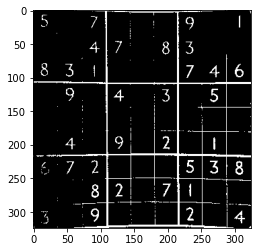

In [99]:
img = cv.imread("train_5.jpg")
predict_image(img)

In [83]:
1-np.clip(4/24,0,1)

0.8333333333333334